<a href="https://colab.research.google.com/github/BifoldTide/-Core-Proyecto-2-Parte-I-/blob/develop/(Core)_Proyecto_2_%E2%80%93_Parte_I_EDA_4_(Califormia_Housing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Descripción de datos:
Dataset importado desde sklearn, tamaño: 20640 filas
Columnas:
-  MedInc    
- HouseAge
- AveRooms    
- AveBedrms  
- Population  
- AveOccup  
- Latitude  
- Longitude
- MedHouseVal

### Carga de bibliotecas y datos

In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Adaptamos el dataset a pandas
houses = fetch_california_housing()
df = pd.DataFrame(data=houses.data, columns=houses.feature_names)
df['MedHouseVal'] = houses.target

# Descarga del dataset
df.to_csv("california_housing.csv")

# Comprobar que los datos están bien
df.info()
df.head()

# Eliminar outliers
df = df[df['AveBedrms'] < 9]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### Gráficos

               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.147465  0.644655  -0.252363    0.005950 -0.044464   
HouseAge    -0.147465  1.000000 -0.231062  -0.120517   -0.284727 -0.025296   
AveRooms     0.644655 -0.231062  1.000000   0.080577   -0.103981  0.019826   
AveBedrms   -0.252363 -0.120517  0.080577   1.000000    0.028644 -0.131363   
Population   0.005950 -0.284727 -0.103981   0.028644    1.000000  0.241554   
AveOccup    -0.044464 -0.025296  0.019826  -0.131363    0.241554  1.000000   
Latitude    -0.087935  0.032822  0.126206   0.046147   -0.122694 -0.150422   
Longitude   -0.009866 -0.150925 -0.044580   0.011087    0.123452  0.181475   
MedHouseVal  0.677012  0.074711  0.263897  -0.125104    0.003608 -0.257121   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.087935  -0.009866     0.677012  
HouseAge     0.032822  -0.150925     0.074711  
AveRooms     0.126206  -0.044580     0.263897  
AveBedrms    0.046147   0.0

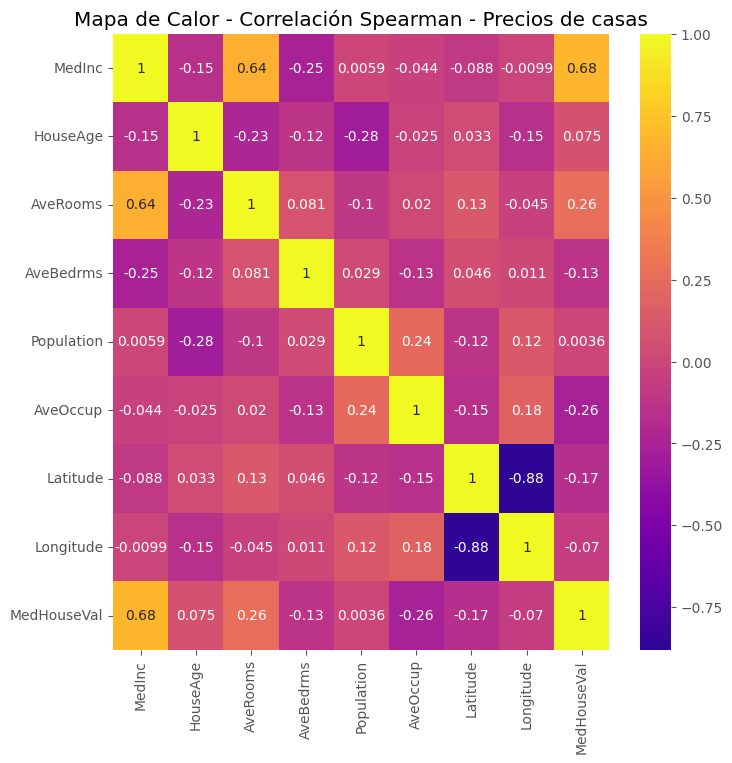

In [26]:
# Mapa de calor

# Generación correlativo con Spearman (es el que prefiero)
corr_spearman = df.corr(method='spearman')
print(corr_spearman)
from os import name
# Generación mapa con correlativo
fig = plt.figure(figsize=(8, 8))
sns.heatmap(corr_spearman, annot=True, cmap='plasma', center=0)
plt.title("Mapa de Calor - Correlación Spearman - Precios de casas")
plt.show()

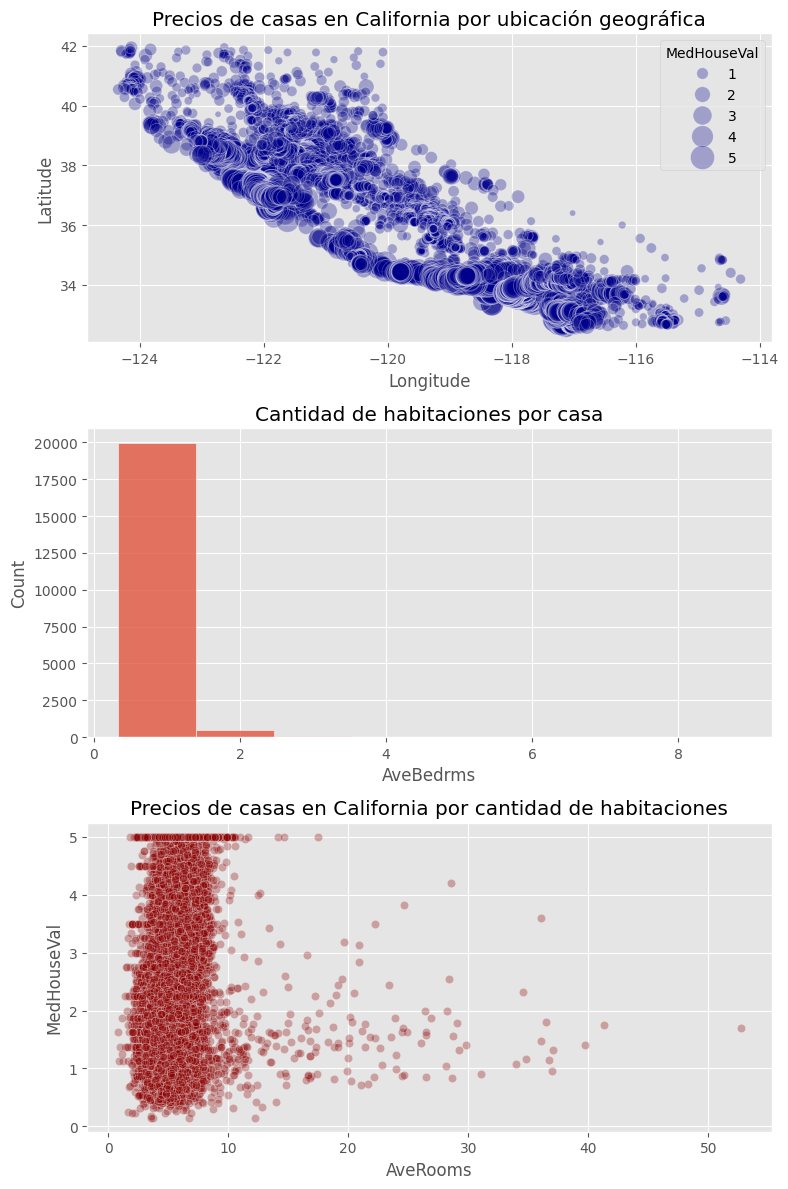

In [32]:
# Gráficos:
fig = plt.figure(figsize = (8, 12))
plt.style.use('ggplot')
plt.subplot(3, 1, 1)
sns.scatterplot(data = df, x = "Longitude", y = "Latitude", size = "MedHouseVal", sizes=(20, 300), alpha = 0.3, color = "darkblue")
plt.title("Precios de casas en California por ubicación geográfica")

plt.subplot(3, 1, 2)
# Histograma de habitaciones por casa
sns.histplot(data = df, x = "AveBedrms", bins = 8)
plt.title("Cantidad de habitaciones por casa")

# Diagrama de dispersión de precio por habitaciones
plt.subplot(3, 1, 3)
sns.scatterplot(data = df, x = "AveRooms", y = "MedHouseVal", alpha = 0.3, color = "darkred")
plt.title("Precios de casas en California por cantidad de habitaciones")
plt.tight_layout()
plt.show()


### Resumen
- Las casas con mayores precios son aquellas que están ubicadas en las ciudades (San Francisco, Los Ángeles)
- La mayoría de las casas tienen de 1 a 2 dormitorios
- Las casas más baratas con las que están en sectores remotos o fuera de los límites de las ciudades